In [19]:
import simpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def mobil(env, parkiran, nama, rng, logs):
    # Mobil datang ke parkiran
    arrival_time = rng.exponential(1)  # Laju kedatangan rata-rata 1 mobil per jam
    yield env.timeout(arrival_time)
    arrival = env.now
    print(f"{nama} datang pada waktu: {arrival:.2f} jam")

    with parkiran.request() as req:
        yield req
        # Mobil parkir selama distribusi normal waktu
        park_time = max(0, rng.normal(4, 1))  # Rata-rata 4 jam, deviasi standar 1 jam
        yield env.timeout(park_time)
        departure = env.now
        print(f"{nama} pergi pada waktu: {departure:.2f} jam")
        logs.append({'nama': nama, 'waktu datang': arrival, 'waktu pergi': departure, 'lama parkir': departure - arrival})

def setup(env, num_mobil, rng, logs):
    parkiran = simpy.Resource(env, capacity=3)  # Kapasitas parkiran 3 mobil

    # Membuat beberapa mobil di parkiran
    for i in range(num_mobil):
        env.process(mobil(env, parkiran, f'Mobil {i}', rng, logs))

In [21]:
# Membuat lingkungan simulasi
env = simpy.Environment()
rng = np.random.default_rng()  # Generator angka acak
logs = []  # Menyimpan log waktu datang dan pergi
num_mobil = 10  # Jumlah mobil yang akan diuji
setup(env, num_mobil, rng, logs)
env.run(until=24)  # Simulasi berjalan untuk 24 jam

Mobil 0 datang pada waktu: 0.01 jam
Mobil 3 datang pada waktu: 0.10 jam
Mobil 1 datang pada waktu: 0.11 jam
Mobil 4 datang pada waktu: 0.15 jam
Mobil 8 datang pada waktu: 0.21 jam
Mobil 2 datang pada waktu: 0.46 jam
Mobil 5 datang pada waktu: 0.50 jam
Mobil 7 datang pada waktu: 0.71 jam
Mobil 9 datang pada waktu: 2.11 jam
Mobil 6 datang pada waktu: 2.86 jam
Mobil 3 pergi pada waktu: 4.31 jam
Mobil 0 pergi pada waktu: 5.58 jam
Mobil 1 pergi pada waktu: 5.73 jam
Mobil 4 pergi pada waktu: 7.16 jam
Mobil 2 pergi pada waktu: 9.55 jam
Mobil 8 pergi pada waktu: 10.32 jam
Mobil 5 pergi pada waktu: 11.53 jam
Mobil 7 pergi pada waktu: 13.76 jam
Mobil 9 pergi pada waktu: 14.97 jam
Mobil 6 pergi pada waktu: 15.46 jam


In [30]:
df = pd.DataFrame(logs)
df.sort_values(by='nama', inplace=True)
print(df)

      nama  waktu datang  waktu pergi  lama parkir
1  Mobil 0      0.012715     5.576023     5.563308
2  Mobil 1      0.113963     5.725748     5.611786
4  Mobil 2      0.455491     9.548603     9.093111
0  Mobil 3      0.101948     4.307155     4.205206
3  Mobil 4      0.150158     7.156614     7.006456
6  Mobil 5      0.504377    11.525851    11.021474
9  Mobil 6      2.864757    15.464371    12.599614
7  Mobil 7      0.709625    13.755581    13.045956
5  Mobil 8      0.208969    10.318130    10.109161
8  Mobil 9      2.110282    14.965472    12.855190


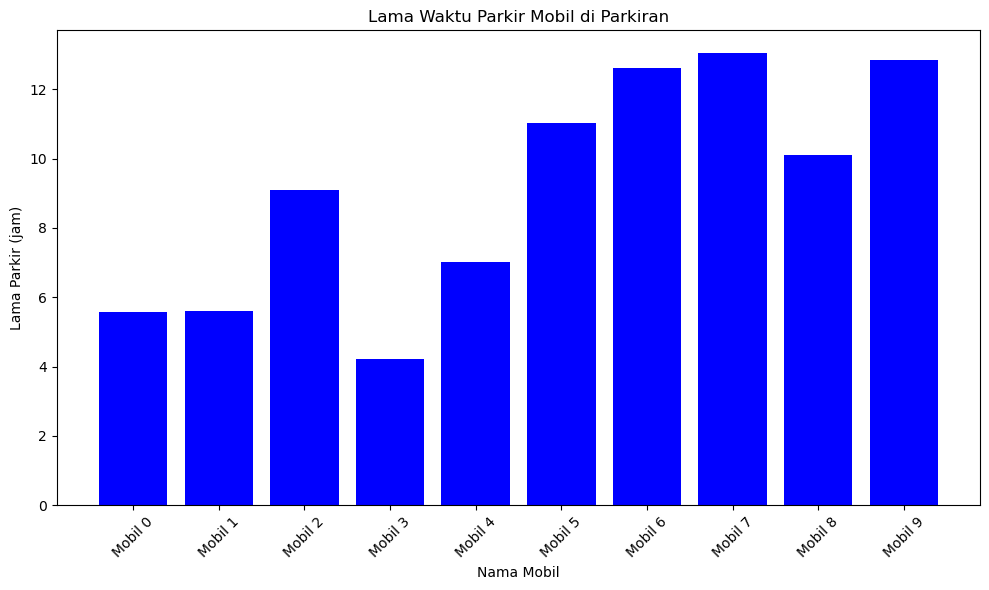

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(df['nama'], df['lama parkir'], color='blue')
plt.xlabel('Nama Mobil')
plt.ylabel('Lama Parkir (jam)')
plt.title('Lama Waktu Parkir Mobil di Parkiran')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()